# 1. Introduction
* Background: describe about the problem you want to solve, the approaches for
such a problem, etc.
* Objectives: the purposes of your project.

# 2. Methods
* Dataset description: describe the dataset.
* Data exploration and visualization: explore the content of the dataset to better
understand the data.
* Data pre-processing: perform pre-processing and cleaning operations on the
dataset, provide justification for your implementation.
* Model selection: select suitable models for the dataset and provide justification
for your selection. Give brief explanation of how the models work.
* Model training and validation: perform model training and validate the
performance of the models.
* Model tuning and testing: fine tune the models and perform final testing.
# 3. Results and Discussion
* Summarize the training and testing results.
* Perform in-depth analysis of the prediction performance and errors of the models.
* Compare the performance between different models using tables and figures.
* Discuss their strengths and weaknesses.
* Investigate what features are important for the prediction, etc.
# 4. Conclusions
* Summarize what have been done and the findings.

# 1. Introduction
## Background
????
## Objective
Train machine learning models that can accurately predict the cardiovascular risk (low, medium, high) of an individual, using the information provide. The results can be helpful for cardiovascular disease diagnosis and prevention.

# 2. Methods  
The “dataset.csv” dataset consists of 17 features (an individual’s demographic information,
eating habits, physical activities etc.) and one prediction output for three levels of cardiovascular
risk. The data contain certain complexity with missing data and noise. 


# Data Exploration Section

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

ds = pd.read_csv("dataset.csv")
ds.head()

,Gender,Age,Height(cm),Weight(kg),Family_history,Alcohol,Junk_food,Vege_day,Meals_day,Snack,Smoking,Water_intake(L),Transportation,Exercise,TV,Income,Discipline,Cardiovascular_risk(y)
0,Female,42,172.2,82.9,no,low,yes,3,3,Sometimes,no,2.72,car,3,rare,2081,no,medium
1,Female,19,175.3,80.0,yes,none,yes,2,1,Sometimes,no,2.65,bus,3,moderate,5551,no,medium
2,Female,43,158.3,81.9,yes,none,yes,3,1,Sometimes,no,1.89,car,1,rare,14046,no,high
3,Female,23,165.0,70.0,yes,low,no,2,1,Sometimes,no,2.00,bus,0,rare,9451,no,medium
4,Male,23,169.0,75.0,yes,low,yes,3,3,Sometimes,no,2.82,bus,1,often,17857,no,medium


In [2]:
ds.describe()

,Age,Height(cm),Weight(kg),Vege_day,Meals_day,Water_intake(L),Exercise,Income
count,2100.000000,2100.000000,2100.000000,2100.000000,2100.000000,2100.000000,2100.000000,2100.000000
mean,24.302381,170.148286,86.561571,2.423333,2.687143,2.007429,1.006190,9432.386190
std,6.342270,9.340941,26.192242,0.584318,0.810088,0.613122,0.894885,5002.350673
min,14.000000,145.000000,39.000000,1.000000,1.000000,1.000000,0.000000,1000.000000
25%,20.000000,163.000000,65.400000,2.000000,3.000000,1.577500,0.000000,4994.500000
50%,23.000000,170.000000,83.000000,2.000000,3.000000,2.000000,1.000000,9226.500000
75%,26.000000,176.800000,107.250000,3.000000,3.000000,2.480000,2.000000,13841.750000
max,61.000000,198.000000,173.000000,3.000000,4.000000,3.000000,3.000000,18000.000000


array([[<Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'Height(cm)'}>,
        <Axes: title={'center': 'Weight(kg)'}>],
       [<Axes: title={'center': 'Vege_day'}>,
        <Axes: title={'center': 'Meals_day'}>,
        <Axes: title={'center': 'Water_intake(L)'}>],
       [<Axes: title={'center': 'Exercise'}>,
        <Axes: title={'center': 'Income'}>, <Axes: >]], dtype=object)

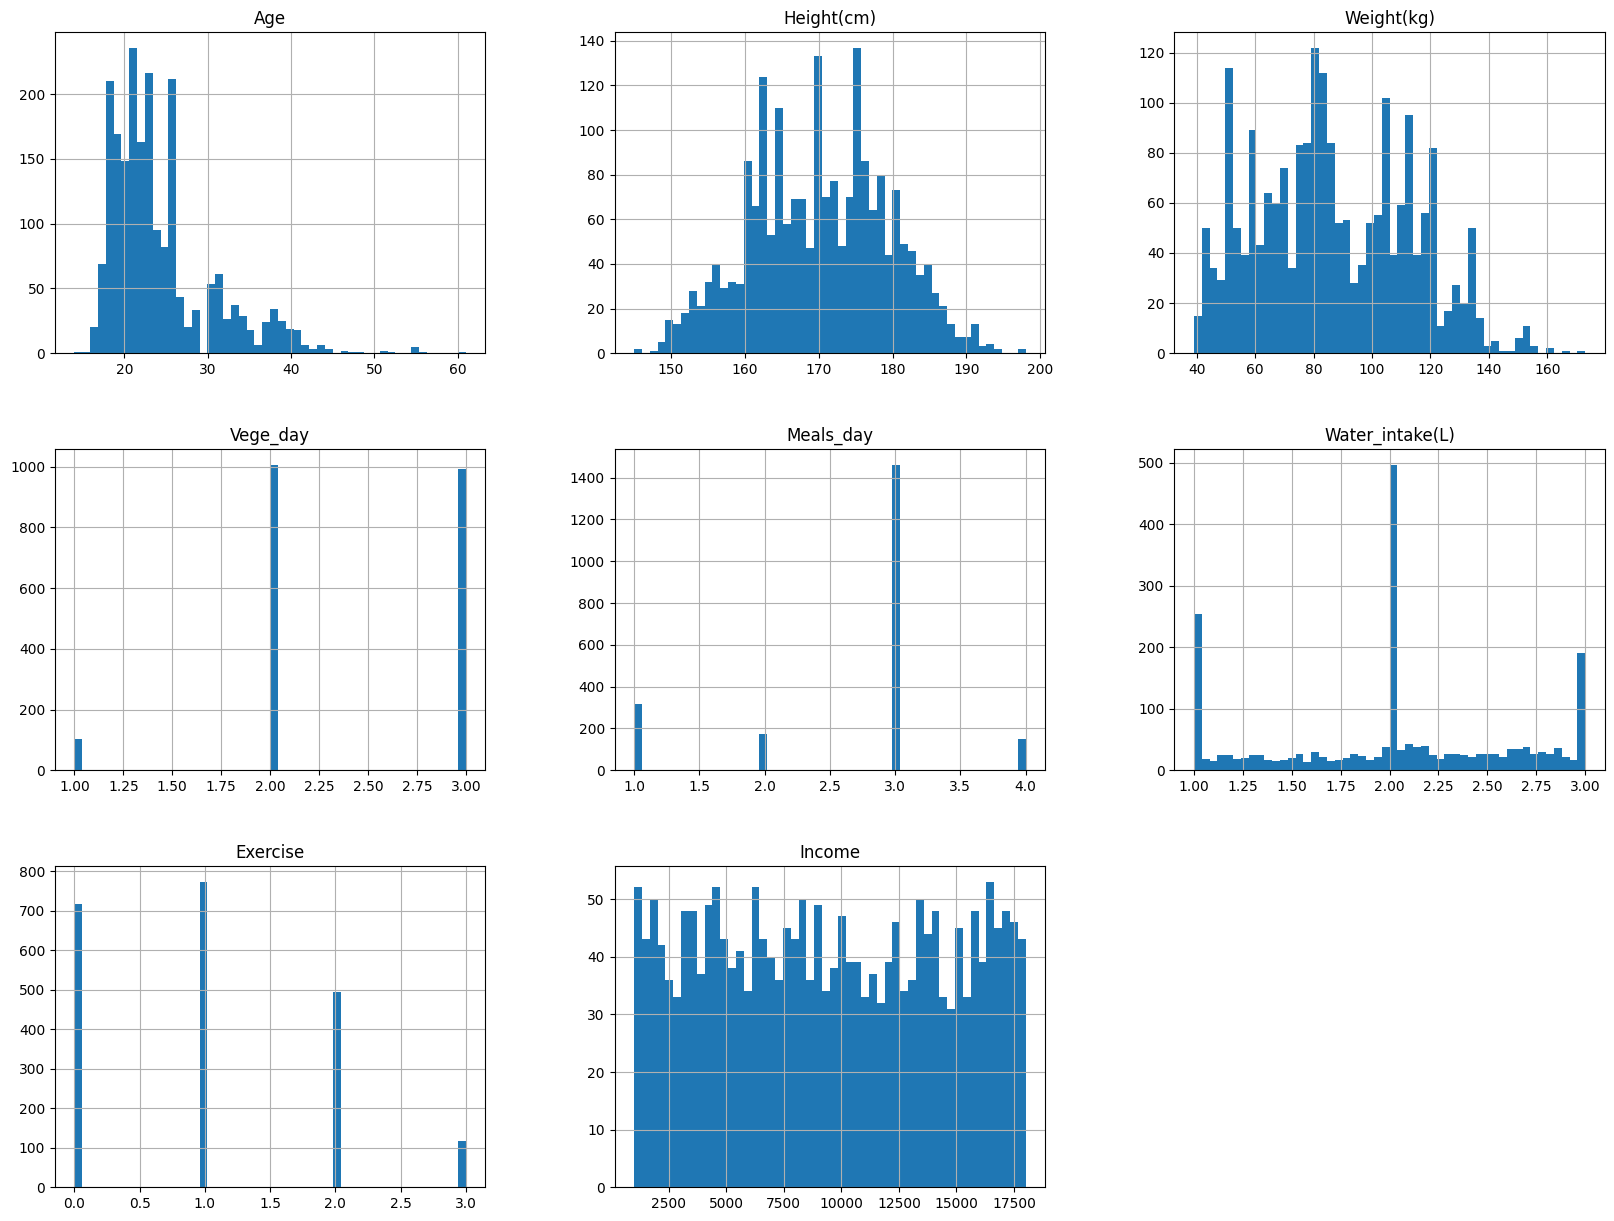

In [3]:
ds.hist(bins = 50, figsize=(20,15))

# Data Preprocessing

Check for null values

In [4]:
ds.isnull().any()

Gender                    False
Age                       False
Height(cm)                False
Weight(kg)                False
Family_history            False
Alcohol                   False
Junk_food                 False
Vege_day                  False
Meals_day                 False
Snack                     False
Smoking                   False
Water_intake(L)           False
Transportation            False
Exercise                  False
TV                        False
Income                    False
Discipline                False
Cardiovascular_risk(y)    False
dtype: bool

In [5]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2100 entries, 0 to 2099
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Gender                  2100 non-null   object 
 1   Age                     2100 non-null   int64  
 2   Height(cm)              2100 non-null   float64
 3   Weight(kg)              2100 non-null   float64
 4   Family_history          2100 non-null   object 
 5   Alcohol                 2100 non-null   object 
 6   Junk_food               2100 non-null   object 
 7   Vege_day                2100 non-null   int64  
 8   Meals_day               2100 non-null   int64  
 9   Snack                   2100 non-null   object 
 10  Smoking                 2100 non-null   object 
 11  Water_intake(L)         2100 non-null   float64
 12  Transportation          2100 non-null   object 
 13  Exercise                2100 non-null   int64  
 14  TV                      2100 non-null   



## Split the dataset into training and testing set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=30)

# split the input matrix into numerical and categorical attributes
X_train_num  = X_train.drop(['Gender','Family_history',Alcohol,Junk_food,Snack,Smoking,Transportation,TV,Discipline], axis = 1)
X_train_cat  = X_train['Gender','Family_history',Alcohol,Junk_food,Snack,Smoking,Transportation,TV,Discipline]

# Fill missing values with median
from sklearn.impute import SimpleImputer   
imputer = SimpleImputer(strategy = 'median')
imputer.fit(X_train_num)                              # compute the median     
X_train_num_tr = imputer.transform(X_train_num)       # fill up missing values with median value for the feature

# Standardize numeric data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler(copy = False)
scaler.fit(X_train_num_tr)       
X_train_num_tr = scaler.transform(X_train_num_tr)

# One-hot encode categorical data
from sklearn.preprocessing import LabelBinarizer
lb_encoder = LabelBinarizer()
lb_encoder.fit(X_train_cat)
X_train_cat_tr = lb_encoder.transform(X_train_cat)       # returns numpy array

# combine the transformed numerical and categorical sets
X_train_tr = np.hstack([X_train_num_tr, X_train_cat_tr])
y_train = y_train.values;  #convert to numpy array
print('X_train_tr shape:', X_train_tr.shape)
print('y_train shape:', y_train.shape)

In [6]:
from sklearn.model_selection import  train_test_split
X = ds.drop('Cardiovascular_risk(y)',axis=1)
y = ds['Cardiovascular_risk(y)']
X_train,X_test,y_train,y_test =  train_test_split(X,y,test_size=0.2,random_state=69)
# split the input matrix into numerical and categorical attributes
X_train_num  = X_train.drop(['Gender','Family_history','Alcohol','Junk_food','Snack','Smoking','Transportation','TV','Discipline'], axis = 1)
X_train_cat  = X_train[['Gender','Family_history','Alcohol','Junk_food','Snack','Smoking','Transportation','TV','Discipline']]

# Fill missing values with median
from sklearn.impute import SimpleImputer   
imputer = SimpleImputer(strategy = 'median')
imputer.fit(X_train_num)                              # compute the median     
X_train_num_tr = imputer.transform(X_train_num)       # fill up missing values with median value for the feature

# Standardize numeric data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler(copy = False)
scaler.fit(X_train_num_tr)       
X_train_num_tr = scaler.transform(X_train_num_tr)

# One-hot encode the categorical features
"""
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder(sparse_output=False)
X_train_cat_val_tr = encoder.fit_transform(X_train_cat)

for X_train_cat_iter in X_train_cat:
    X_train_cat_val = X_train_cat[X_train_cat_iter]
    encoder.fit(X_train_cat_val)
    X_train_cat_val_tr = encoder.transform(X_train_cat_val)
"""

# LabelBinarizer() categorical data

from sklearn.preprocessing import LabelBinarizer
lb_encoder = LabelBinarizer()
for X_train_cat_iter in X_train_cat:
    X_train_cat_val =  X_train_cat[X_train_cat_iter]
    lb_encoder.fit(X_train_cat_val)
    X_train_cat_val_tr = lb_encoder.transform(X_train_cat_val)       # returns numpy array

# combine the transformed numerical and categorical sets
X_train_tr = np.hstack([X_train_num_tr, X_train_cat_val_tr])
y_train = y_train.values;  #convert to numpy array


In [7]:
print('X_train_tr shape:',X_train_tr)
print('y_train shape:', y_train)

X_train_tr shape: [[-0.51948921 -0.96596855 -1.22346306 ... -1.11364623  0.31284646
   0.        ]
 [-0.51948921 -1.71607684 -1.43410782 ...  1.11497279 -0.18275828
   1.        ]
 [-0.67586654  1.17719802 -0.28513641 ... -1.11364623 -0.97002421
   0.        ]
 ...
 [ 1.51341607 -0.37659774 -0.23151774 ... -1.11364623  0.75701675
   0.        ]
 [-0.67586654  1.07003969  1.05533024 ... -1.11364623 -0.50970589
   0.        ]
 [ 0.41877476  1.93802215  0.50382397 ...  1.11497279 -0.20548513
   0.        ]]
y_train shape: ['low' 'low' 'low' ... 'medium' 'high' 'medium']


# Test set preprocessing

In [8]:
# split the input matrix into numerical and categorical attributes
X_test_num  = X_test.drop(['Gender','Family_history','Alcohol','Junk_food','Snack','Smoking','Transportation','TV','Discipline'], axis = 1)
X_test_cat  = X_test[['Gender','Family_history','Alcohol','Junk_food','Snack','Smoking','Transportation','TV','Discipline']]

# Fill missing values with median
from sklearn.impute import SimpleImputer   
imputer = SimpleImputer(strategy = 'median')
imputer.fit(X_test_num)                              # compute the median     
X_test_num_tr = imputer.transform(X_test_num)       # fill up missing values with median value for the feature

# Standardize numeric data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler(copy = False)
scaler.fit(X_test_num_tr)       
X_test_num_tr = scaler.transform(X_test_num_tr)

# One-hot encode the categorical features
"""
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder(sparse_output=False)
X_train_cat_val_tr = encoder.fit_transform(X_train_cat)

for X_train_cat_iter in X_train_cat:
    X_train_cat_val = X_train_cat[X_train_cat_iter]
    encoder.fit(X_train_cat_val)
    X_train_cat_val_tr = encoder.transform(X_train_cat_val)
"""

# LabelBinarizer() categorical data

from sklearn.preprocessing import LabelBinarizer
lb_encoder = LabelBinarizer()
for X_test_cat_iter in X_test_cat:
    X_test_cat_val =  X_test_cat[X_train_cat_iter]
    lb_encoder.fit(X_test_cat_val)
    X_test_cat_val_tr = lb_encoder.transform(X_test_cat_val)       # returns numpy array

# combine the transformed numerical and categorical sets
X_test_tr = np.hstack([X_test_num_tr, X_test_cat_val_tr])
y_test = y_test.values;  #convert to numpy array

In [9]:
print('X_train_tr shape:',X_test_tr.shape)
print('y_train shape:', y_test.shape)

X_train_tr shape: (420, 9)
y_train shape: (420,)


# Method 1 : kNN neighbor
Import the neccesary functions

In [10]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [11]:
k = 5

In [12]:
knn = KNeighborsClassifier(n_neighbors=k)
knn.fit(X_train_tr,y_train)

KNeighborsClassifier()

In [13]:
y_pred = knn.predict(X_test_tr)

In [14]:
print("Accuracy:",  accuracy_score(y_test,y_pred))
print("Confusion Matrix: \n", confusion_matrix(y_test,y_pred))
print("Classification Report: \n", classification_report(y_test,y_pred))

Accuracy: 0.830952380952381
Confusion Matrix: 
 [[184   0   8]
 [  8  85  21]
 [ 21  13  80]]
Classification Report: 
               precision    recall  f1-score   support

        high       0.86      0.96      0.91       192
         low       0.87      0.75      0.80       114
      medium       0.73      0.70      0.72       114

    accuracy                           0.83       420
   macro avg       0.82      0.80      0.81       420
weighted avg       0.83      0.83      0.83       420



In [15]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {'n_neighbors': np.arange(1, 25)}

# Grid search for the best parameter
knn_gs = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5)
knn_gs.fit(X_train_tr, y_train)

# Best k
print("Best k:", knn_gs.best_params_)

Best k: {'n_neighbors': 1}


In [16]:
# Train the k-NN classifier with the best parameters
best_knn = KNeighborsClassifier(n_neighbors=knn_gs.best_params_['n_neighbors'])
best_knn.fit(X_train_tr, y_train)

# Evaluate again
y_pred_best = best_knn.predict(X_test_tr)
print("Accuracy with best k:", accuracy_score(y_test, y_pred_best))
print("Confusion Matrix: \n", confusion_matrix(y_test,y_pred_best))
print("Classification Report: \n", classification_report(y_test,y_pred_best))

Accuracy with best k: 0.8595238095238096
Confusion Matrix: 
 [[183   0   9]
 [  5  91  18]
 [ 13  14  87]]
Classification Report: 
               precision    recall  f1-score   support

        high       0.91      0.95      0.93       192
         low       0.87      0.80      0.83       114
      medium       0.76      0.76      0.76       114

    accuracy                           0.86       420
   macro avg       0.85      0.84      0.84       420
weighted avg       0.86      0.86      0.86       420



In [20]:
y_train_pred_best = best_knn.predict(X_train_tr)
train_accuracy = accuracy_score(y_train, y_train_pred_best)
print("Training Accuracy:", train_accuracy)
y_test_pred_best = best_knn.predict(X_test_tr)
test_accuracy = accuracy_score(y_test, y_test_pred_best)
print("Test Accuracy:", test_accuracy)

Training Accuracy: 1.0
Test Accuracy: 0.8595238095238096


In [21]:
from sklearn.model_selection import cross_val_score

# Perform cross-validation
cv_scores = cross_val_score(knn, X_train_tr, y_train, cv=5)
print("Cross-Validation Scores:", cv_scores)
print("Mean Cross-Validation Score:", cv_scores.mean())

Cross-Validation Scores: [0.82142857 0.79761905 0.85416667 0.80059524 0.80059524]
Mean Cross-Validation Score: 0.8148809523809524


In [23]:
# Example of trying different k values
best_k = None
best_test_accuracy = 0

for k in range(1, 21):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_tr, y_train)
    y_test_pred = knn.predict(X_test_tr)
    test_accuracy = accuracy_score(y_test, y_test_pred)
    
    if test_accuracy > best_test_accuracy:
        best_test_accuracy = test_accuracy
        best_k = k

print(f"Best k: {best_k} with Test Accuracy: {best_test_accuracy}")

Best k: 1 with Test Accuracy: 0.8595238095238096


In [24]:
from sklearn.model_selection import cross_val_score

k_values = range(1, 21)
cv_scores = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train_tr, y_train, cv=5)
    cv_scores.append(scores.mean())

# Select the best k with the highest cross-validated accuracy
best_k = k_values[np.argmax(cv_scores)]
print(f"Best k from cross-validation: {best_k}")

Best k from cross-validation: 1
